# **PCA**

# **Task 1: Exploratory Data Analysis (EDA):**

## **1.	Load the dataset and perform basic data exploration.**

In [31]:
import pandas as pd

# Load dataset
df = pd.read_csv('wine.csv')



In [32]:
df.shape

(178, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [34]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## **2.	Examine the distribution of features using histograms, box plots, or density plots.**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Histogram**

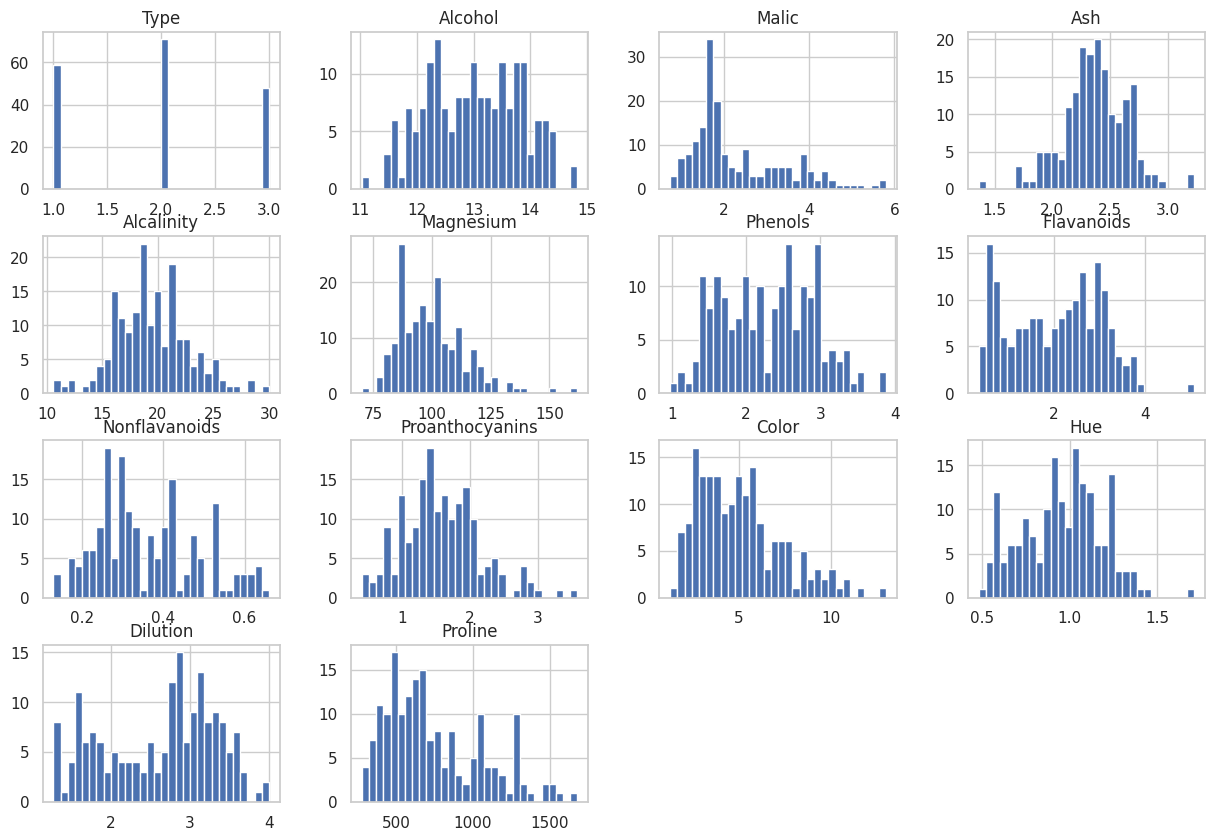

In [36]:
# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()

## **Boxplot**

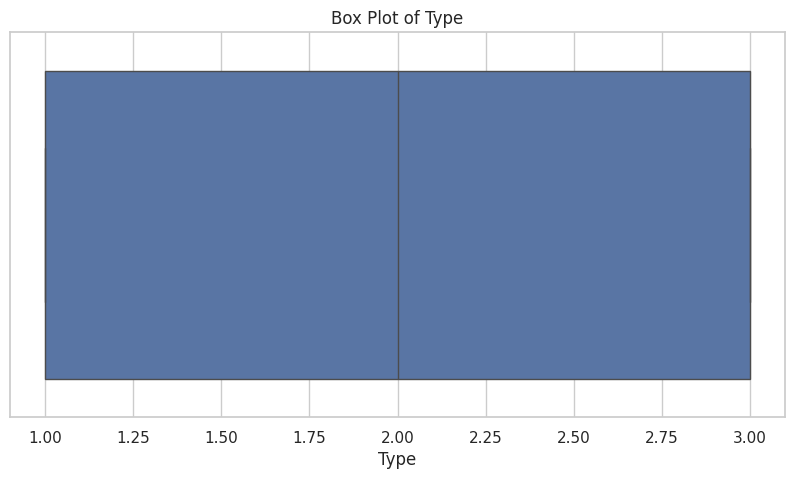

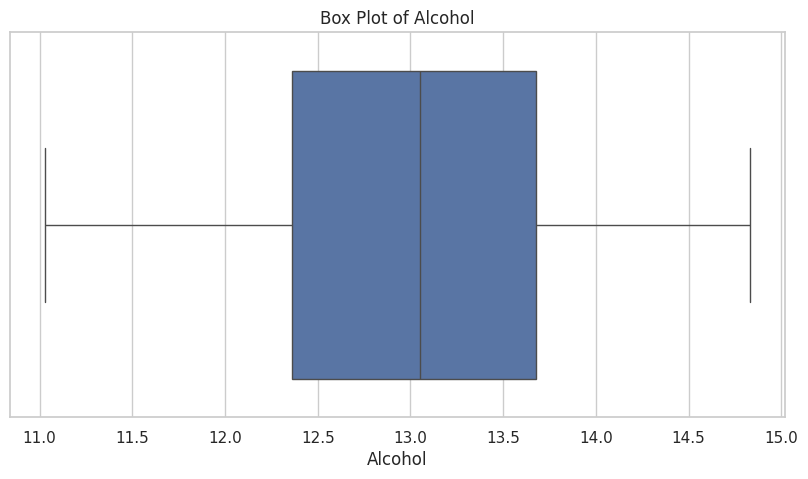

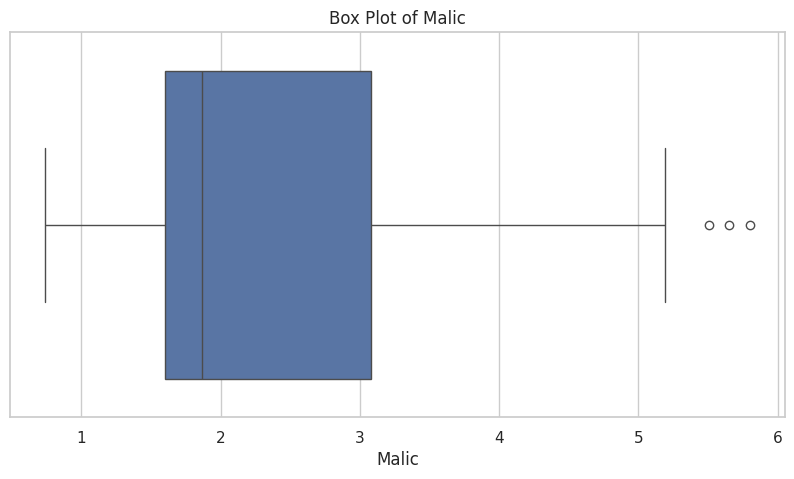

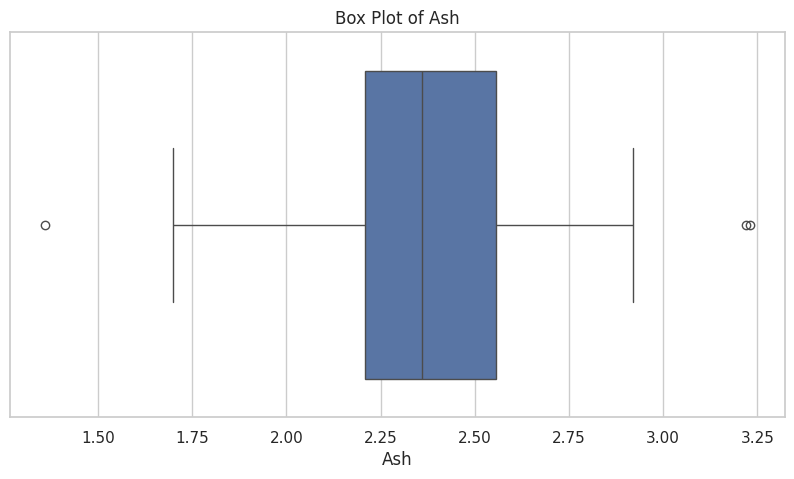

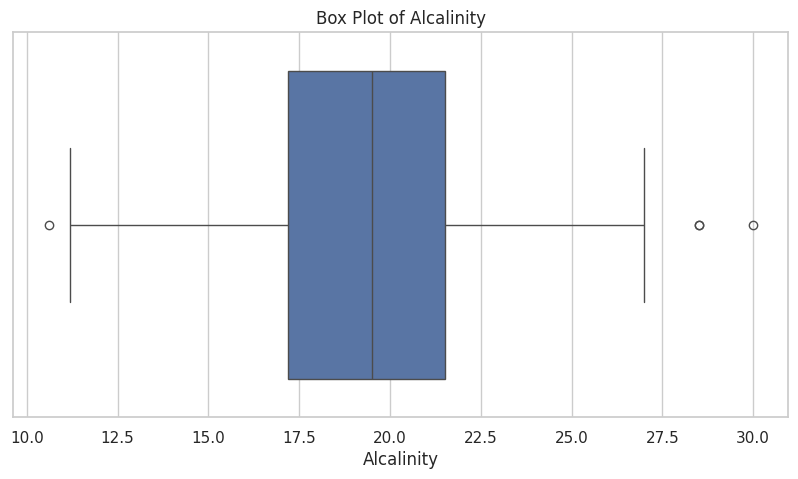

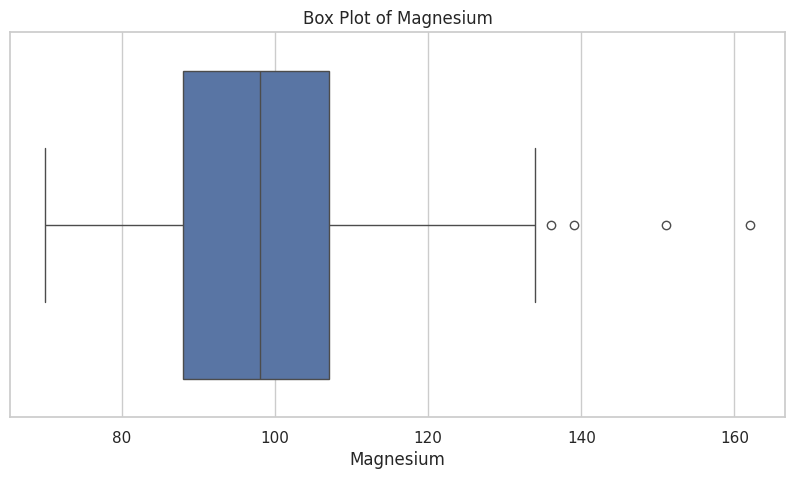

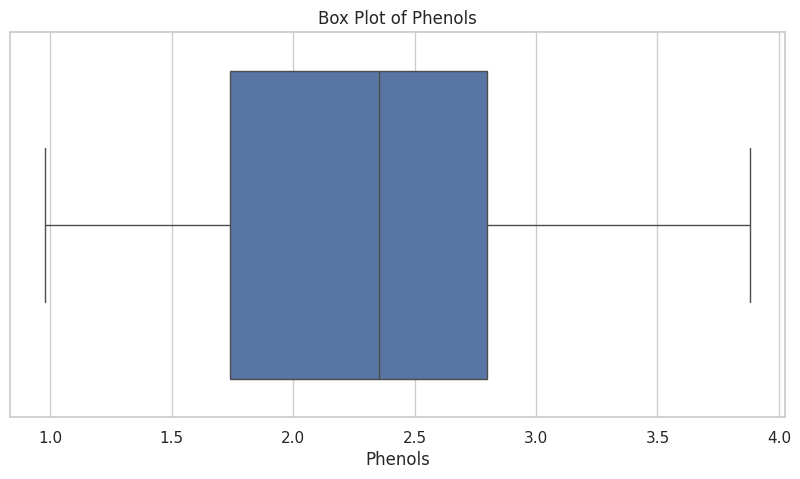

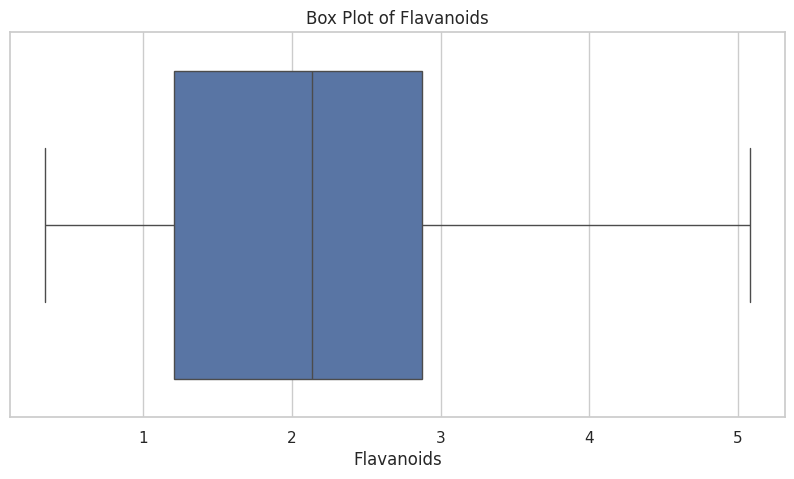

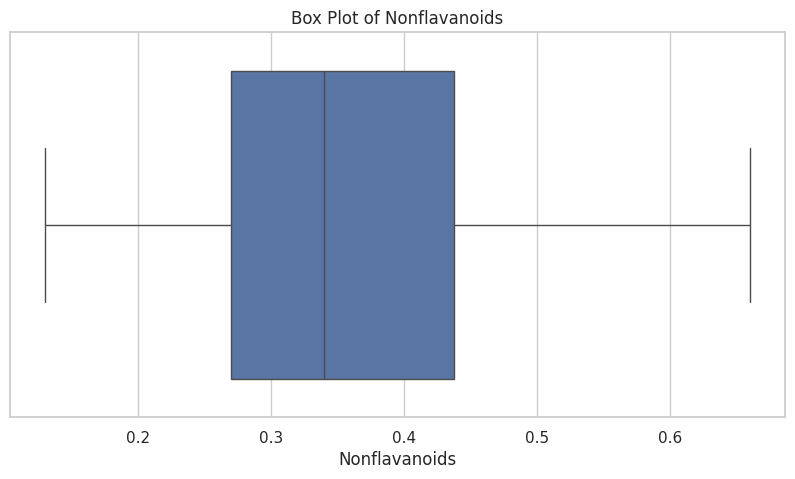

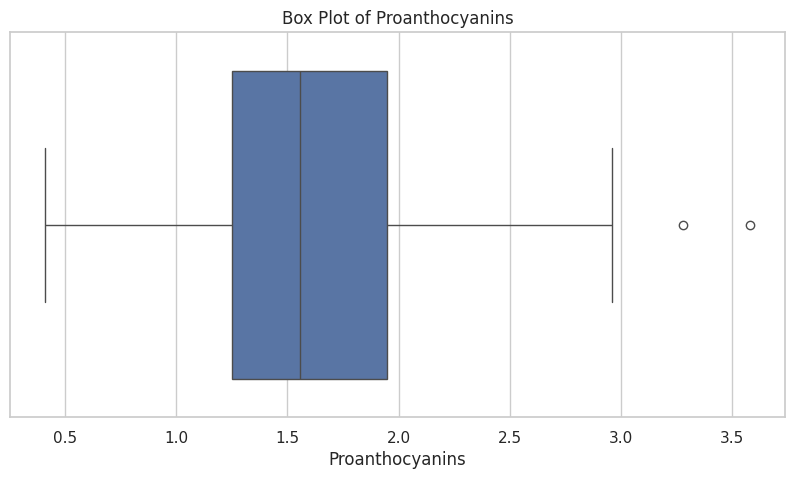

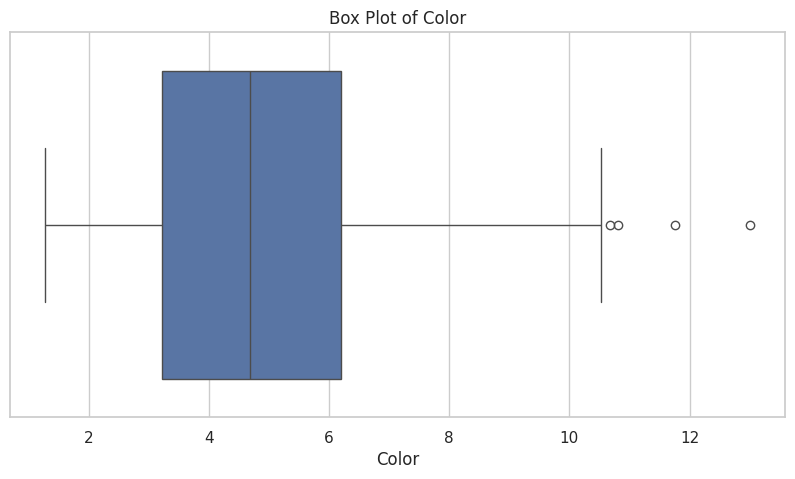

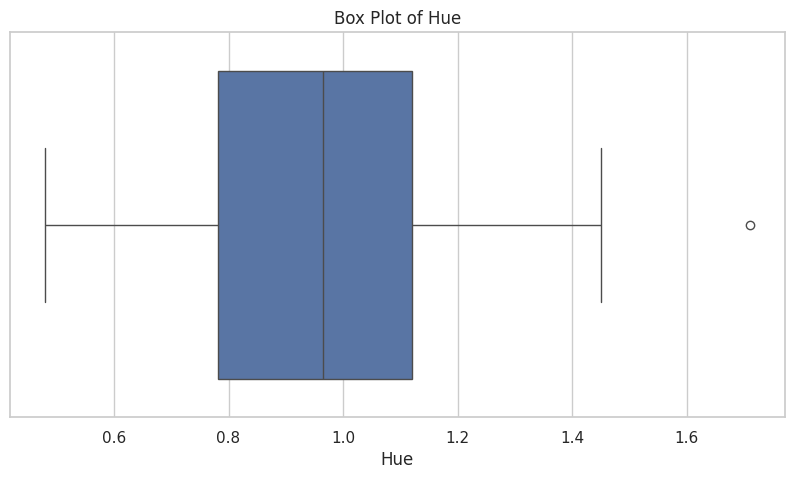

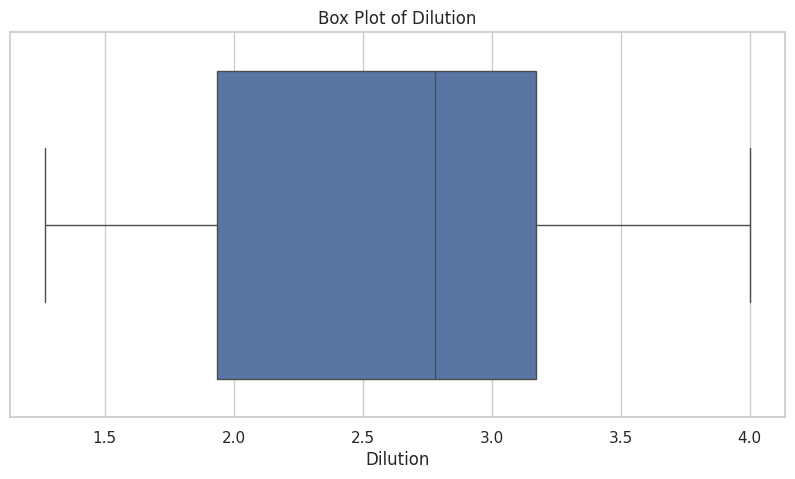

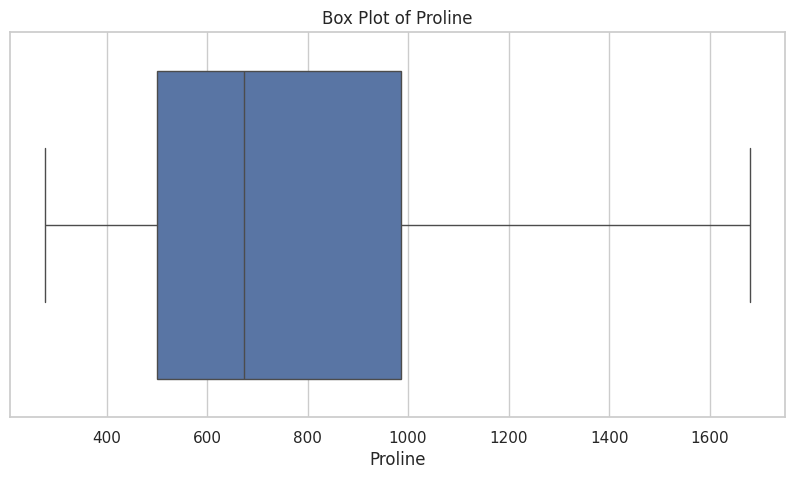

In [37]:
# Box plots for detecting outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

## **Density Plots**

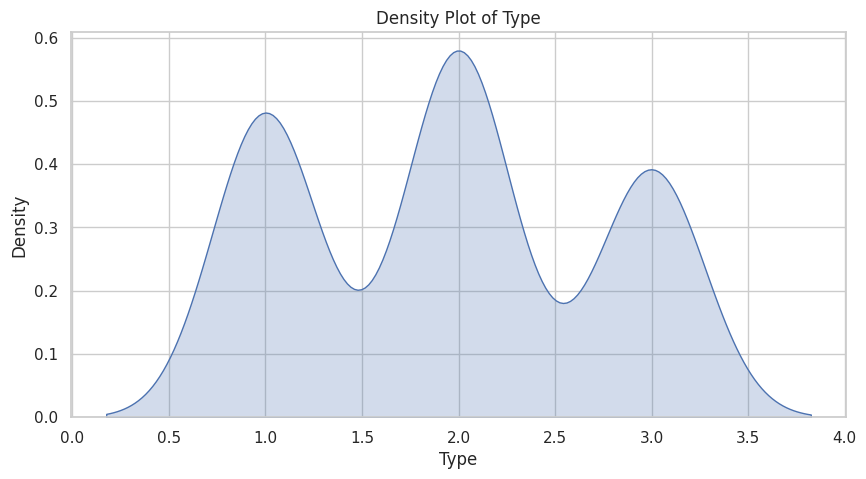

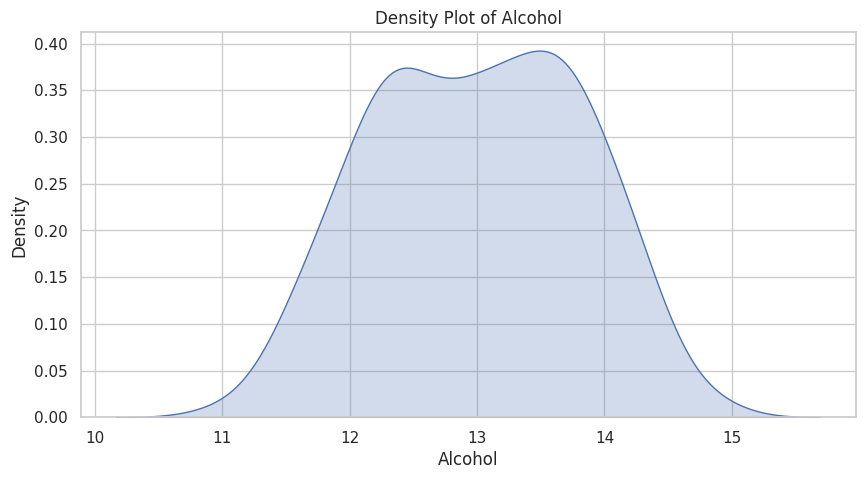

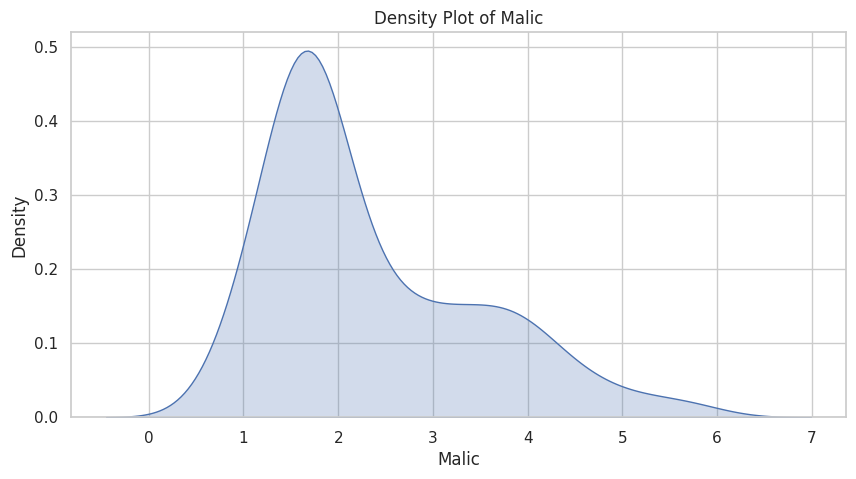

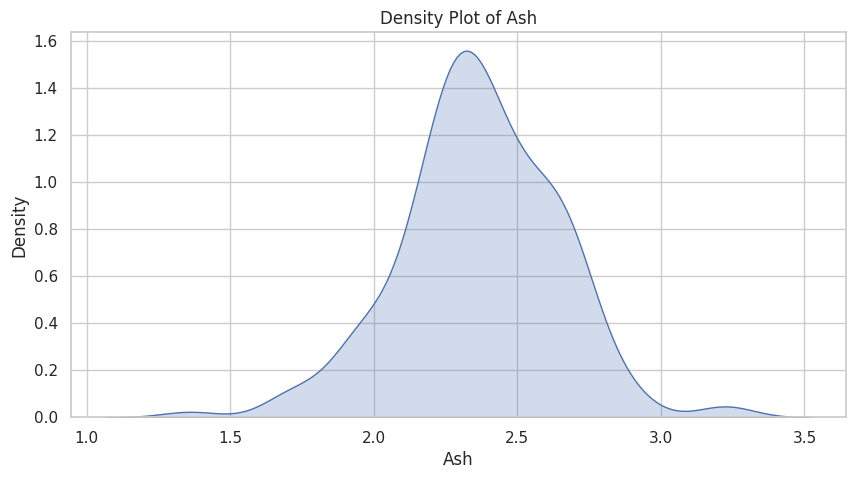

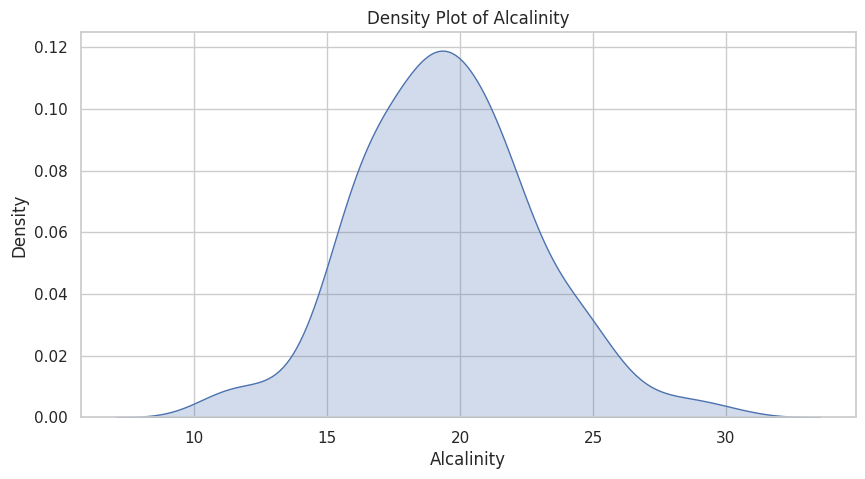

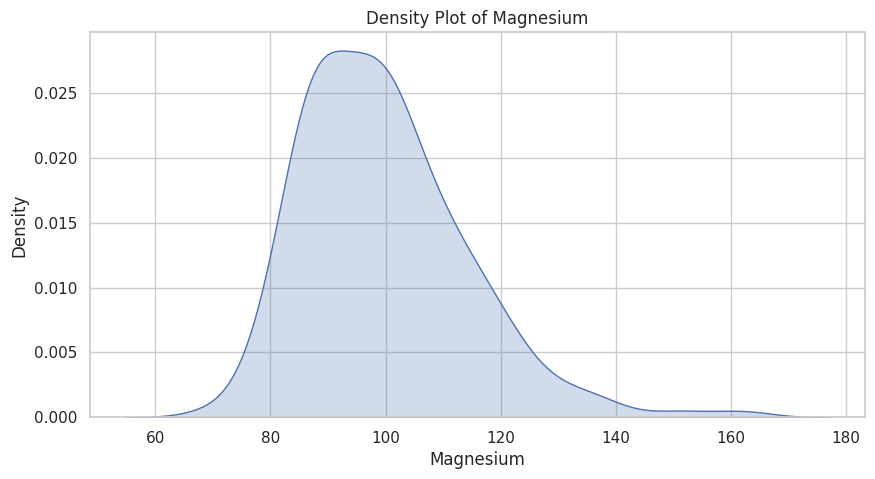

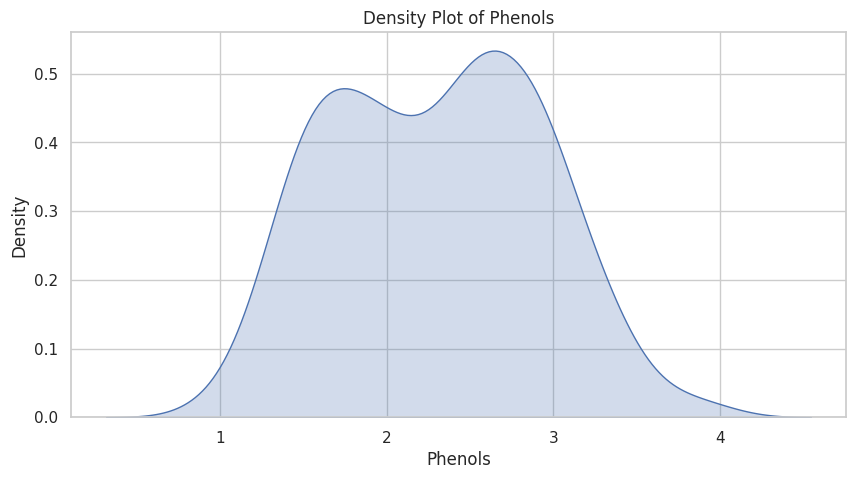

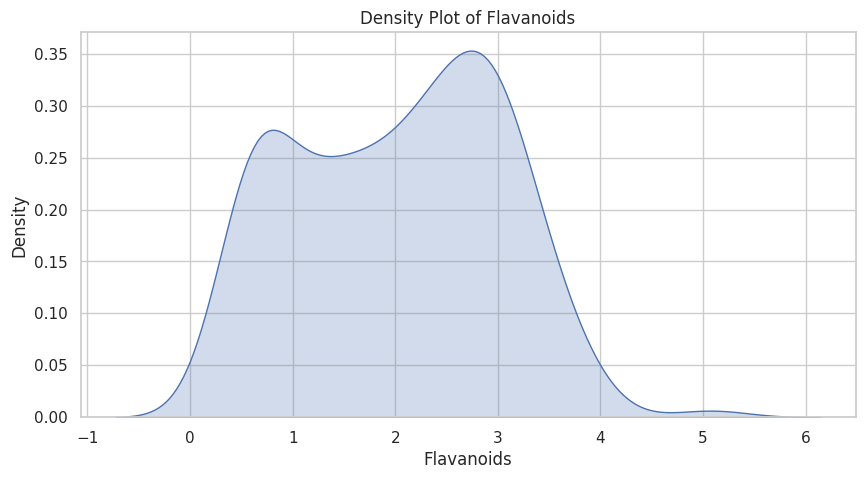

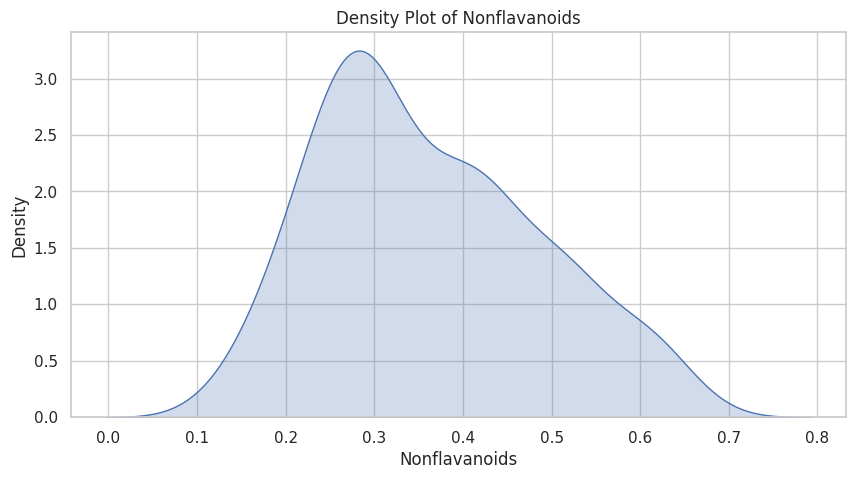

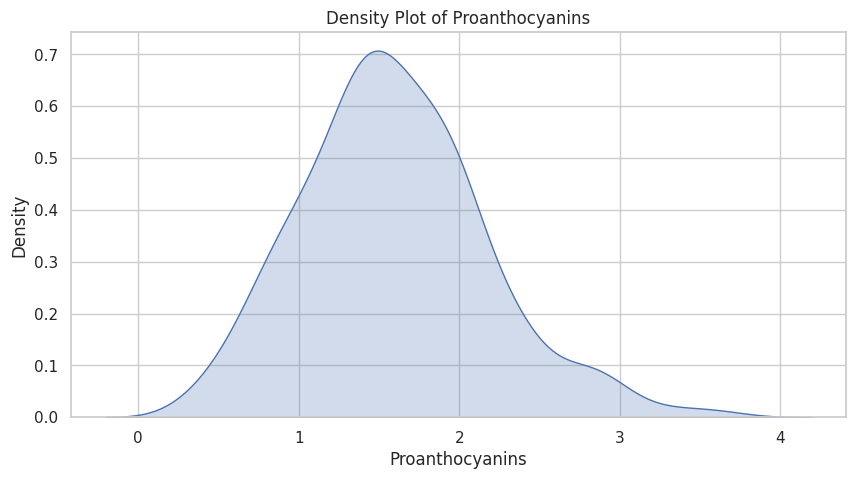

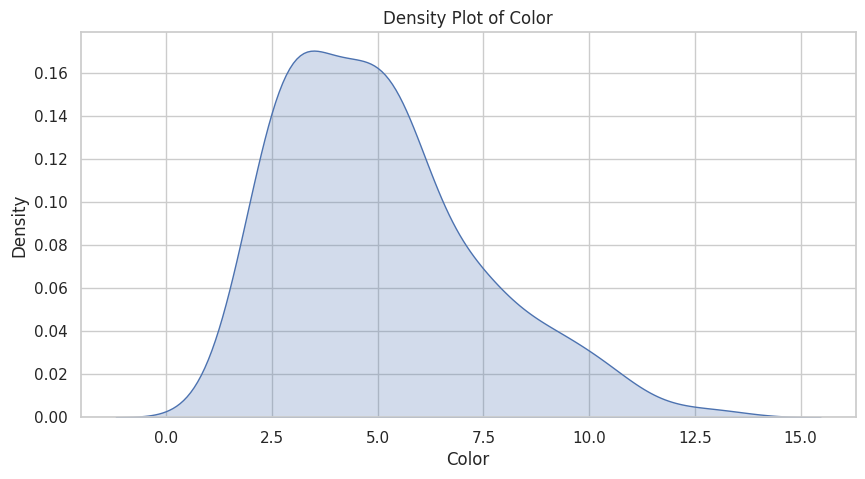

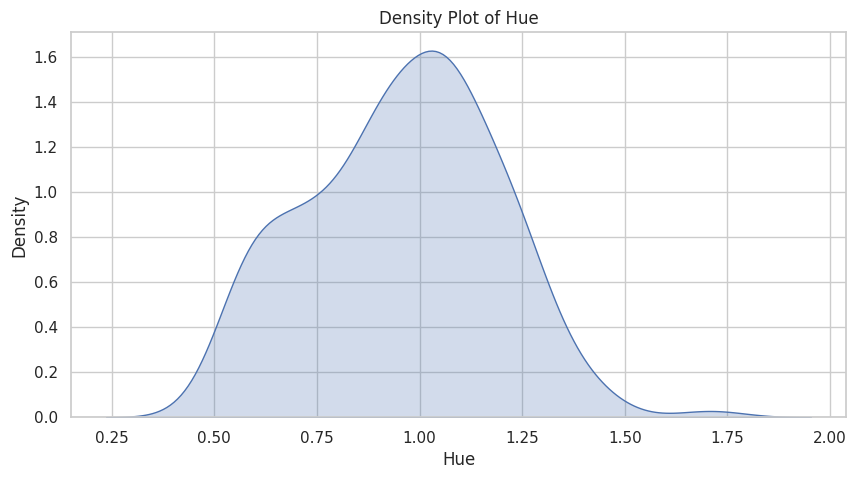

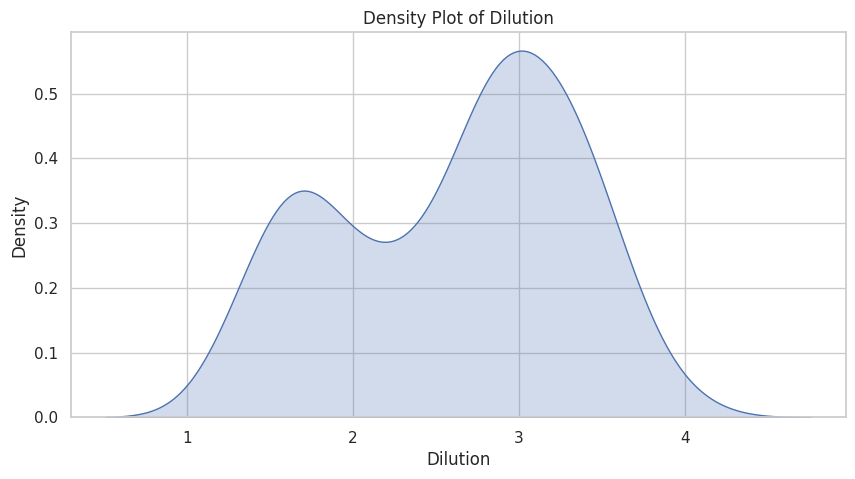

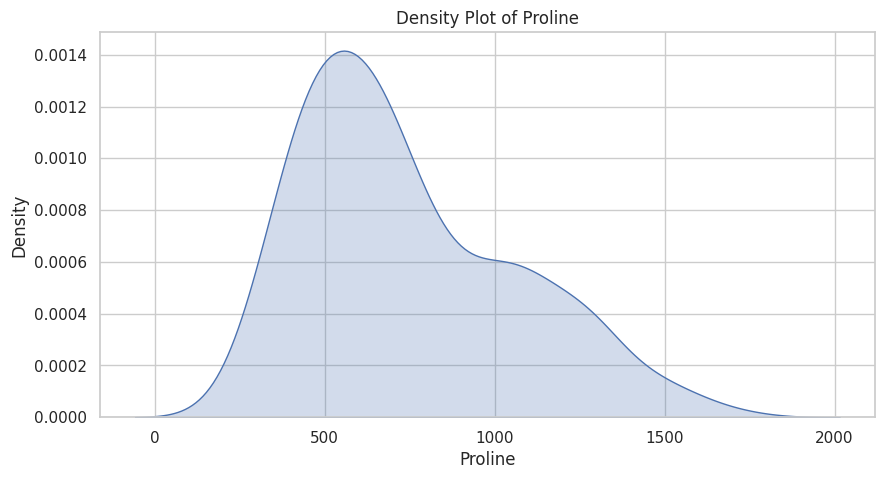

In [38]:

# Density plots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.show()


## **3.	Investigate correlations between features to understand relationships within the data.**

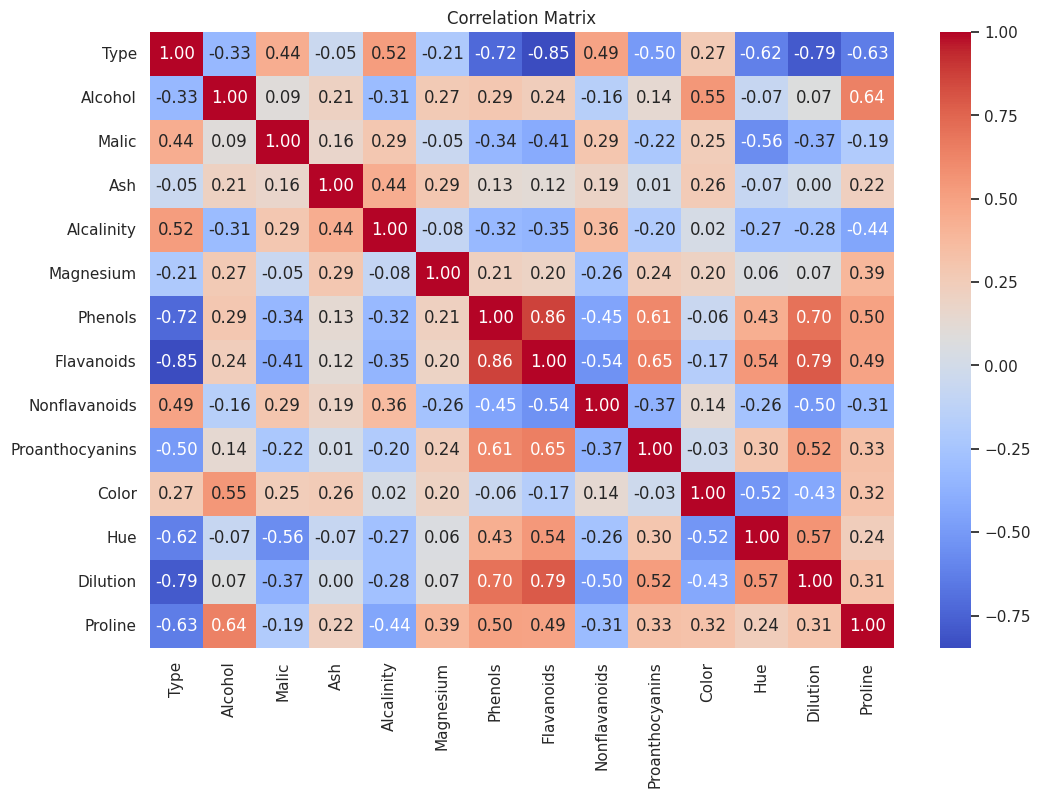

In [39]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Task 2: Dimensionality Reduction with PCA:**

### **1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.**

In [40]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))


### **2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.**

In [41]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(scaled_data)


PCA()

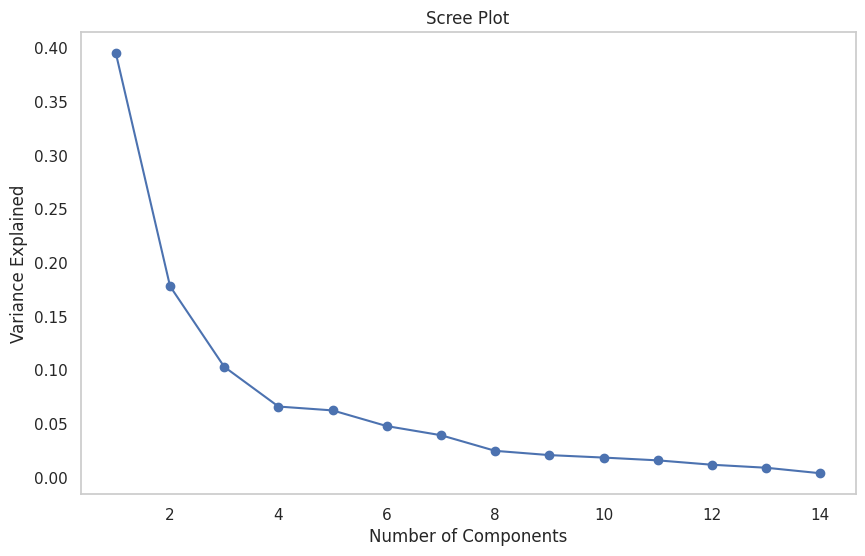

In [42]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()



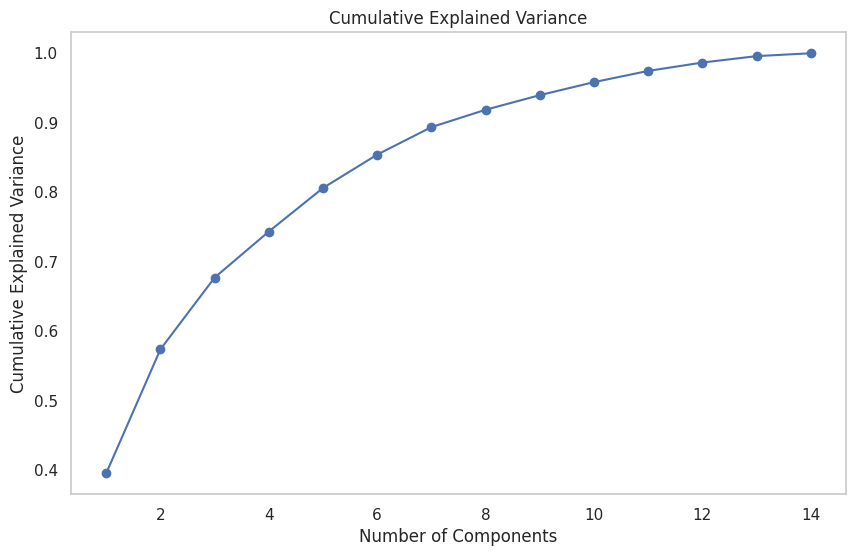

In [43]:
# Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


## **3.	Transform the original dataset into the principal components.**

In [44]:
# Transform data
pca_components = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_components)


# **Task 3: Clustering with Original Data:**

## **1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.**

In [45]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

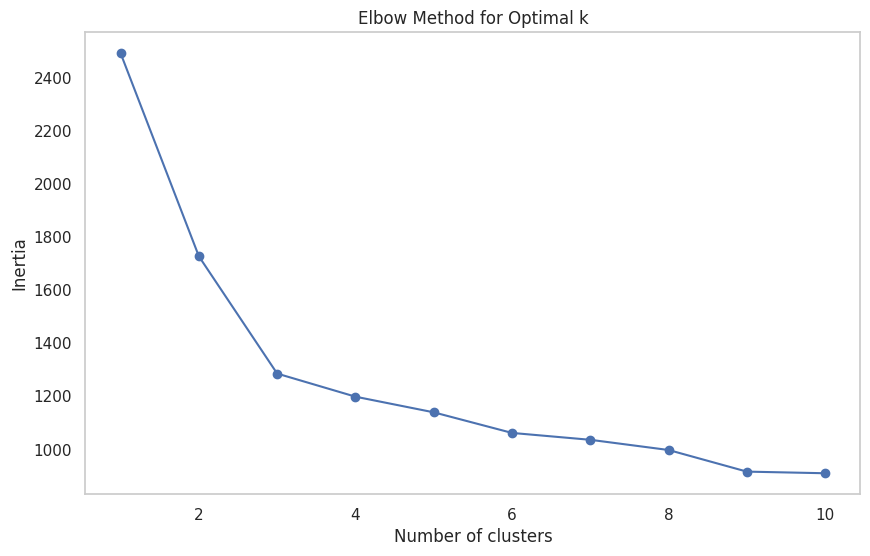

In [46]:
# Plot inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [47]:

# Fit K-means with chosen k (e.g., k=3)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


## **2.	Visualize the clustering results using appropriate plots.**

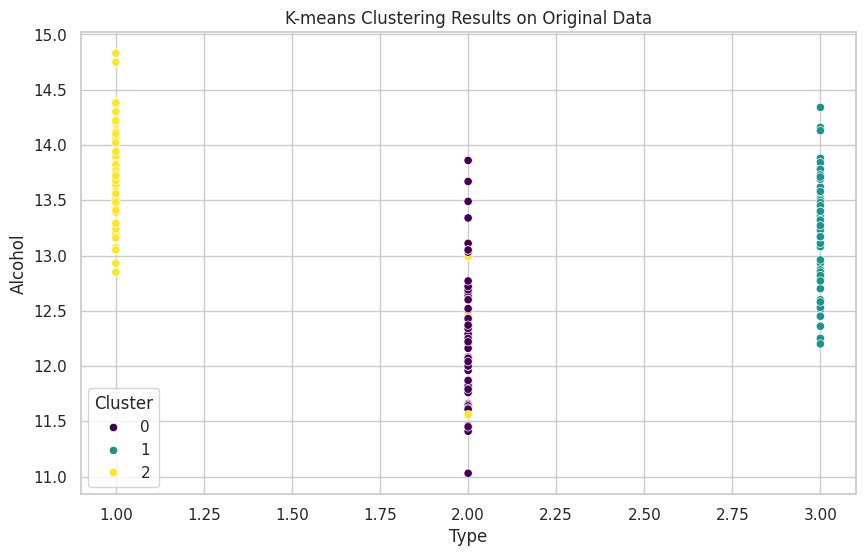

In [48]:
# Visualize clustering results (e.g., with first two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='Cluster', palette='viridis') # Pass df to the data parameter
plt.title('K-means Clustering Results on Original Data')
plt.show()

## **3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.**

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(scaled_data, clusters)
db_index = davies_bouldin_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies–Bouldin Index: {db_index}')


Silhouette Score: 0.30648398324833453
Davies–Bouldin Index: 1.315707552261773


# **Task 4: Clustering with PCA Data:**

## **1.	Apply the same clustering algorithm to the PCA-transformed dataset.**

In [50]:
# Fit K-means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3)
clusters_pca = kmeans_pca.fit_predict(pca_df)
pca_df['Cluster'] = clusters_pca


## **2.	Visualize the clustering results obtained from PCA-transformed data.**

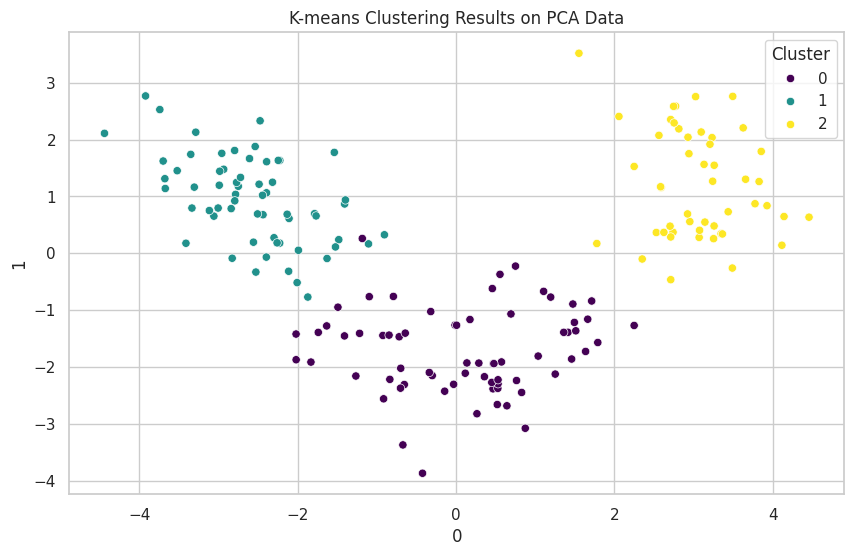

In [51]:
# Visualize clustering results from PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x=0, y=1, hue='Cluster', palette='viridis') # Pass pca_df to the data argument
plt.title('K-means Clustering Results on PCA Data')
plt.show()

# **Task 5: Comparison and Analysis:**

### **1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.**

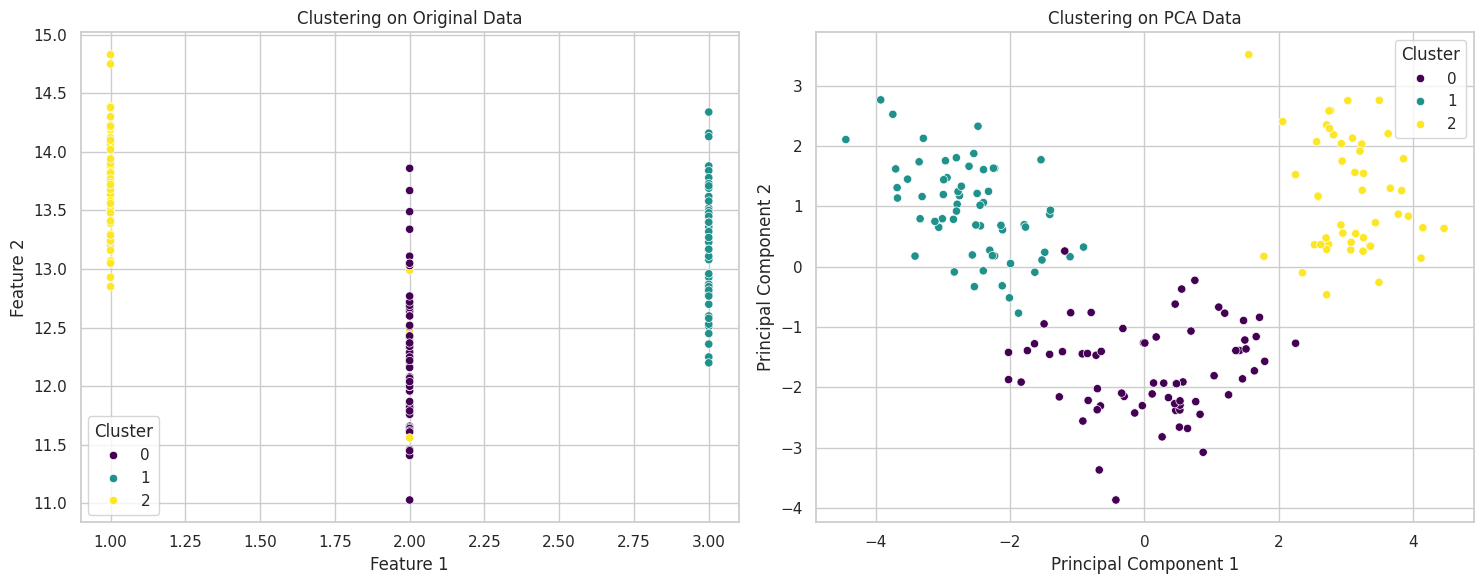

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original Data Clusters
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='Cluster', palette='viridis', ax=axes[0])
axes[0].set_title('Clustering on Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# PCA Data Clusters
# Pass pca_df to the data argument and specify column names for x and y
sns.scatterplot(data=pca_df, x=0, y=1, hue='Cluster', palette='viridis', ax=axes[1])
axes[1].set_title('Clustering on PCA Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Show the plots
plt.tight_layout()
plt.show()

### **2.	Discuss any similarities or differences observed in the clustering results.**

*  Cluster Size Are  similar in size,Shapes are also similar for both and Distribution varies

*  PCA reduces dimensions, which may lead to loss of information that is critical for defining clusters.

*   Some features may have been weighted differently during PCA, affecting how clusters are formed.

*  Redundant features may have contributed noise in the original dataset, but PCA might have removed this noise, resulting in clearer clusters in the PCA-transformed data.



### **3.	Reflect on the impact of dimensionality reduction on clustering performance.**

*  Noise Reduction: PCA can help reduce noise, which often leads to improved clustering performance. If clusters in the PCA data are more distinct and well-separated, this suggests that PCA effectively filtered out irrelevant or redundant dimensions.

*  Structure Enhancement: PCA enhances the separation of clusters if the principal components capture the most variance. If clusters are tightly grouped in PCA space, it indicates that the principal components encapsulated significant relationships among the data points.

### **4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.**

*  **Original Data:** Clusters are often easier to interpret as they relate directly to original features, which stakeholders may understand better.

*  **PCA Data:** Clusters in PCA-transformed space may be less interpretable because principal components are linear combinations of original features.

*  Reducing dimensions can lead to faster computations in clustering algorithms, especially with large datasets.

*  However, PCA computation itself has overhead, especially if the original dataset is very large.

*  While PCA aims to preserve variance, not all information is retained, which might be critical for clustering. It’s essential to assess whether the retained dimensions still represent the original data’s complexity.

# **Task 6: Conclusion and Insights**

## **1.	Summarize the key findings and insights from the assignment.**

*  In this assignment we did EDA(Exploratory data analysis) and discribed the data,here we have greater then 3 dimensions that is 14D (14 Dimensions), and visualised the data with Histogram where some of the dimensions are normal distributed , and some are partially normal distributed and observed from boxplot that there are nearly no outliers found in the dataset.and original dataset clusters are linearly distributed for the clustered as 0,1,2 in linearly at particular size , and after the PCA the dataset in uniformly distribued and clustered the similar values as 0,1,2 clusters , here we clustered using K-Means method and found silhouette score = 0.30 or Davies–Bouldin index =1.31 .we redused the dimensions using the PCA method and compared the origanal data and PCA data

## **2.	Discuss the practical implications of using PCA and clustering in data analysis.**

*  PCA and clustering can be valuable for exploratory data analysis, feature selection, and reducing dimensionality in machine learning pipelines.

*  For instance, in image processing, PCA can reduce features while clustering can identify similar patterns, facilitating tasks like image classification.

## **3.	Provide recommendations for when to use each technique based on the analysis conducted.**

**When to Cluster Directly on Original Data:**

*  When interpretability of results is paramount, and stakeholders need clear connections to original features.

*  If the dataset is small and manageable, maintaining the original feature set may provide more insights.

**When to Use PCA:**

*  When the dataset is high-dimensional with many correlated features.
*   PCA assumes linear relationships between features, which may not capture the complexity of non-linear data structures.
*  If exploratory data analysis indicates potential redundancy among features.

*  When computational efficiency is necessary for subsequent analyses (e.g., clustering).

*  PCA is effective when dealing with datasets that have a large number of features relative to the number of observations.

**When to use t-SNE**

*  t-SNE is particularly effective for visualizing high-dimensional datasets (e.g., text embeddings, image features).When we have a dataset with hundreds of features and want to visualize the underlying structure.

*  t-SNE captures non-linear relationships in data, making it useful when traditional linear methods (like PCA) fail to reveal meaningful patterns.

*  t-SNE is a versatile tool for visualizing complex high-dimensional data, especially in exploratory analysis and when identifying clusters. It’s particularly valuable when you expect non-linear relationships or when traditional linear methods fall short. However, always consider its limitations and use it as a complementary tool alongside other techniques like PCA for a more comprehensive analysis.

